In [3]:
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import os, sys 
import torchvision
import os
import torch
from torch.autograd import Variable
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.nn.init import xavier_normal_
from pkg_resources import parse_version
import pytoune
from pytoune.framework import Model
from pytoune.layers import Flatten
from livelossplot import PlotLossesPytoune
import warnings
warnings.filterwarnings("ignore")
plt.ion() 

Using TensorFlow backend.


In [10]:
data_dir = 'data'
data_dir = os.path.expanduser(data_dir)
 
train_transform= transforms.Compose([
    transforms.Resize([128, 128]),
    transforms.ToTensor(),
])
     
 
trainset = ImageFolder(data_dir, transform=train_transform)
train_dataloader = DataLoader(trainset, batch_size=4, shuffle=True)
 


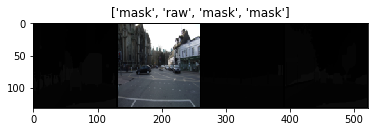

In [11]:
def imshow(inp_tensor, title=None):
    img = inp_tensor.numpy().transpose((1, 2, 0))
    plt.imshow(img)
    
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
 
trainset_iter = iter(train_dataloader)
images, labels = trainset_iter.next()
 
batch_imgs = torchvision.utils.make_grid(images)
imshow(batch_imgs, title=[trainset.classes[x] for x in labels])


In [12]:
def init_module(module):
    for m in module.modules():
        if isinstance(m, nn.Linear):
            xavier_normal_(m.weight.data, 1)
            m.bias.data.zero_()


In [17]:

# defining model
torch.manual_seed(42)
module = nn.Sequential(
    Flatten(),
    nn.Linear(3*128*128, 4),
)
init_module(module)

optimizer = optim.Adam(module.parameters(), lr=1e-3)
model = Model(module, 
              optimizer, 
              nn.CrossEntropyLoss(), 
              metrics=['accuracy'])
'''
if torch.cuda.is_available():
    model.cuda(0)
'''

'\nif torch.cuda.is_available():\n    model.cuda(0)\n'

In [18]:
metric2title = {
    'loss': 'Cross-Entropy Loss', 
    'acc':'Accuracy'}

plot_losses = PlotLossesPytoune(metric2title=metric2title)


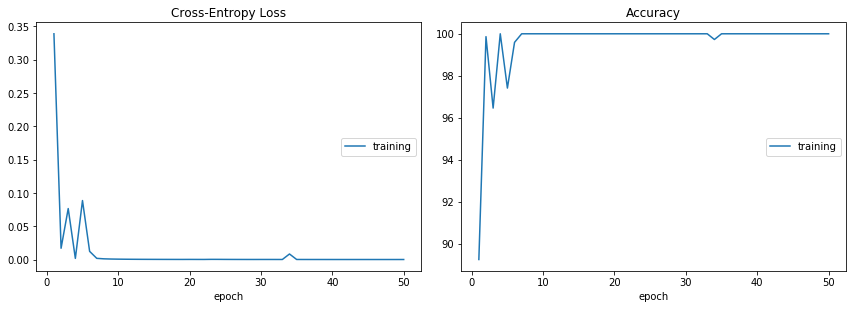

In [19]:
history = model.fit_generator(train_dataloader,  epochs=50,callbacks=[plot_losses], verbose=True)
